In [1]:
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt


# Testing Machine Learning Algorithms

*Based on Tom Mitchell: Machine Learning, McGraw-Hill Science/Engineering/Math, 1997; Chapter 5, pages 128-153; [full text from the author](http://www.cs.cmu.edu/~tom/files/MachineLearningTomMitchell.pdf)*

**Task:** Let $X$ be a set, e.g., the set of all $d$-dimensional vectors
with entries from the interval $\langle 0,1\rangle$. Let
$f: X \to \{0,1\}$ be a target function. The goal of a learning
algorithm is to identify a function $h: X \to \{0,1\}$, called
hypothesis, from some class of functions $\mathcal{H}$ such that the
function $h$ is a good approximation of the target function $f$. The
only information the algorithm can use is a sample $S\subset X$ called
training set together with the correct value $f(x)$ for each $x \in S$.
The sample $S$ is a set of $n$ elements from $X$ randomly selected
according to some probabilistic distribution $D$.

When the learning algorithm selects some function $h$, we can easily
measure how well $h$ approximates $f$ on the training set by counting
the number of elements from $S$ for which both functions $f$ and $h$
have the same value. Then, the error of  hypothesis $h$ on the
training set is
$${\sf Error}_S(h)=\frac{1}{n} \sum_{x \in S} \delta(f(x),h(x)) \enspace,$$
where $n$ is the size of $S$ and $\delta$ is the classification error
function $$\delta(\alpha,\beta) =
\begin{cases}
    1 & \text{for $\alpha \not= \beta$}\\
    0 & \text{for $\alpha = \beta$}
\end{cases}$$ Hence, $${\sf Error}_S(h)=\frac{r}{n}\enspace,$$ where $r$
is the number of elements from $S$, which were incorrectly classified by
$h$.

**Problems:**

1.  How can we estimate the accuracy of $h$ on *any* sample taken from $X$
    according to the same probability distribution $D$?

2.  How good is this estimator - what is the probable error of this
    estimator?

We want to know the error rate of the hypothesis $h$ on the whole set
$X$, i.e., the probability that an element $x \in X$ selected according
to the probability distribution $D$ is classified incorrectly:
$${\sf Error}_D = Pr_{x \in D} [f(x) \not= h(x)] \enspace.$$ Such an error
is called *true error*. It has a binomial distribution. An estimator of
the error can be computed as the number of incorrectly classified
samples divided by the number of samples. However, this estimator must
be computed on a sample that is independent of the training set $S$!
Hence:

> **An estimator of the error of a learning algorithm must be computed
> on a test set $T$ ($\subset X$) independent (disjunctive) of $S$.**

The **maximum likelihood estimate** of the true error rate of the learning
algorithm can be computed from the number of errors $r_T$ on a test set
$T$ of size $n_T=|T|$ as: $${\sf Error}_T(h)=\frac{r_T}{n_T}\enspace.$$
Then, the expected number of errors on $n_T$ samples is $r_T$. Variance
of the number of errors is according to the binomial distribution:
$${\sf Var'}_T = n_T \cdot \frac{r_T}{n_T} \cdot \left(1 - \frac{r_T}{n_T}\right) = n_T \cdot {\sf Error}_T(h)\cdot (1 - {\sf Error}_T(h))\enspace.$$
Also, the standard deviation of the expected number of errors is:
$$\sigma'_T = \sqrt{ {n_T \cdot \sf Error}_T(h)\cdot (1 - {\sf Error}_T(h))}\enspace.$$ 
Hence the standard deviation of the estimator of **the error rate** of hypothesis $h$ on the test set $T$ is
$$\sigma_T = \frac{\sigma'_T}{n_T} =  \sqrt{ \frac {{\sf Error}_T(h)\cdot (1 - {\sf Error}_T(h))}{n_T}}\enspace.$$



In [2]:
# Example
nT = 50
rT = 21
errorT = rT / nT
print("Estimation of the error on the training set",errorT)
print("Mean and variance of the number of errors",scipy.stats.binom.stats(nT, errorT))

Estimation of the error on the training set 0.42
Mean and variance of the number of errors (21.0, 12.180000000000001)


Using `scipy`, plotting the probability mass function for the number of errors for a hypothesis with the error rate `errorT` is easy.

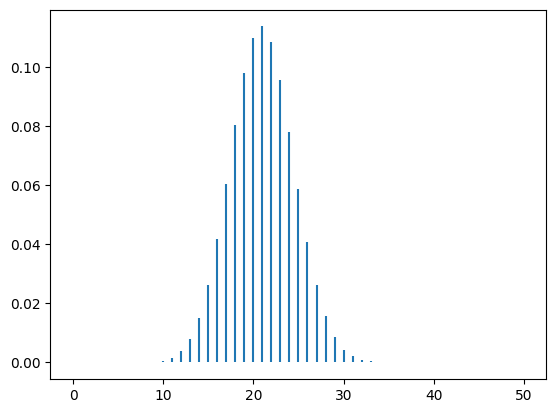

In [3]:
from scipy.stats import binom

rv = binom(nT, errorT)                  # random variable from the binomial distribution 
                                        # with nT experiments with the probablity errorT of success 
x = np.arange(nT+1)

plt.vlines(x, 0, binom.pmf(x, nT, errorT))

Cumulative distribution function. 

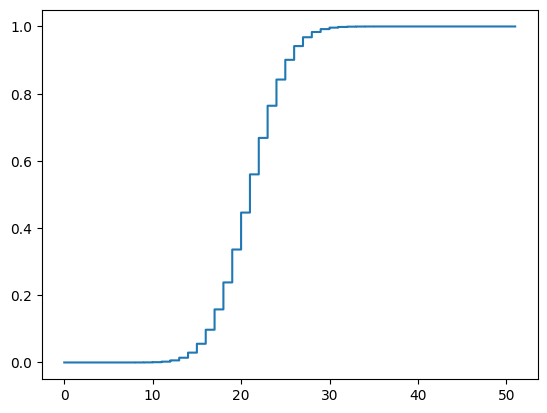

In [4]:
x1 = x + 0.999
xx = np.append(x,x1)
xx.sort()
plt.plot(xx, binom.cdf(xx, nT, errorT))

Now, we can compute the confidence interval - the
interval to which belongs the actual error rate of the hypothesis $h$ on
the whole set $X$ with a prescribed probability $\alpha=0.95$. 

In [5]:
alpha = 0.95
k = scipy.stats.binom.ppf(alpha, nT, errorT)   # Percent point function (inverse of cdf — percentiles).
print(f"With the confidence alpha={alpha}, the hypothesis h makes at most k={k} errors")

With the confidence alpha=0.95, the hypothesis h makes at most k=27.0 errors


i.e., errors on a test set of size $n_T$.
Therefore, the error rate of hypothesis $h$ on the whole $X$ belongs to
the interval $<0,\texttt{k}/n_T>$ with the confidence $\alpha$.

In [6]:
print(f"The estimated error rate of the hypothesis h is {errorT}")
print(f"With the confidence (probability) alpha={alpha}, the true error of the hypothesis is in the interval <0; {k/nT}>")

The estimated error rate of the hypothesis h is 0.42
With the confidence (probability) alpha=0.95, the true error of the hypothesis is in the interval <0; 0.54>


For a sufficiently large $n_T$ (e.g., $n_T \ge 30$, or $n_T \cdot
{\sf Error}_T(h)\cdot (1 - {\sf Error}_T(h)) \ge 5$, respectively), the
binomial distribution can be approximated by the normal distribution
with mean ${\sf Error}_T(h)$ and standard deviation $\sigma_T(h)$.
Consequently, the two-sided $P$%-confidence interval is given by the
following formula $${\sf Error}_T(h)\pm z_P \cdot \sigma_T\enspace,$$
where the values of $z_P$ are called quantiles and can be found in
statistical tables (it is the number of standard deviations that a value lies from the mean of a standard normal distribution). Using `scipy.stats.norm` it is possible to compute $z_P$ directly:

In [7]:
from scipy.stats import norm

a = np.array([80,90,95,98,99])
b=(100+a)/2/100
print(a)
print(b)
norm.ppf(b)


[80 90 95 98 99]
[0.9   0.95  0.975 0.99  0.995]


array([1.28155157, 1.64485363, 1.95996398, 2.32634787, 2.5758293 ])

Hence, e.g., approximately $z_{95} \approx 1.96$ and $z_{99} \approx 2.5758$.

In a single figure, plot the binomial probability distribution for $n=40$
samples with the probability of success $p=0.1$ (as this is a discrete
probability distribution, your task is to plot the distribution function
for arguments $0,\dots,n$) and the normal probability distribution with
the same mean and standard deviation (in this case, it is a continuous
probability distribution, hence you should plot its continuous density
function).

Mean and variance of the number of errors 4.0 1.8973665961010275


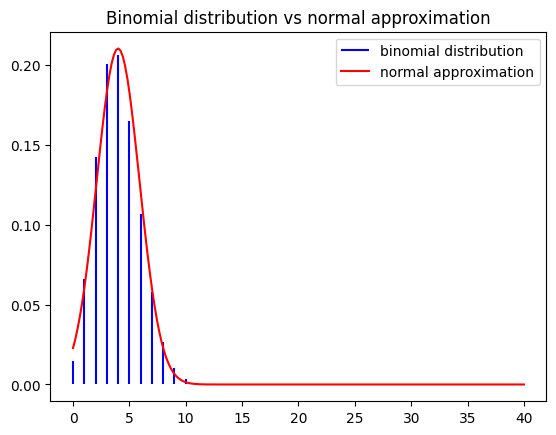

In [8]:
# YOUR CODE HERE
n = 40
p = 0.1
x = np.arange(0, n+1)
xx = np.linspace(0,n,200)
plt.vlines(x, 0, binom.pmf(x, n, p), color = 'blue', label = 'binomial distribution')
mean = p * n
std = np.sqrt(n*p*(1-p))
print("Mean and variance of the number of errors",mean, std)
plt.plot(xx, norm.pdf(xx, mean, std), color = 'red', label = 'normal approximation')
plt.title('Binomial distribution vs normal approximation')
plt.legend()

**A general guidance for deriving a confidence interval**

A $N$% confidence interval for a parameter $p$ is an interval that is
expected with probability $N$% to contain $p$.

Method:

1.  Identify the parameter $p$, which should be estimated - e.g., the
    error of a hypothesis ${\sf Error}_D(h)$.

2.  Derive the estimate $Y$ - in our case, ${\sf
        Error}_T(h)$. If possible, use an unbiased estimate with minimal
    variance.

3.  Determine the probability distribution $D_Y$ for $Y$, including its
    mean and standard deviation.

4.  Establish $N$% confidence interval - i.e., find the limits $L$ and
    $U$ such that $N$% of samples selected according to the probability
    distribution $D_Y$ are between $L$ and $U$.

# Comparing Learning Algorithms

Learning algorithms can be compared using methods for comparing
statistical hypotheses, but better results can be obtained from pair
tests or $k$-fold cross-validation.

## Difference in Error of Two Hypotheses

Suppose that a hypothesis $h_1$ is tested on a set $T_1$ od size $n_1$ and a hypothesis
$h_2$ is tested on a set $T_2$ of size $n_2$. We want to estimate the
difference $d={\sf Error}_D(h_1)-{\sf Error}_D(h_2)$ between their
errors when the samples were drawn from the same underlying probability
distribution $D$. Similarly to the above
section, we
assume that the range of the target function is discrete and the error
of the hypothesis can be computed as the fraction of incorrectly
classified samples from the tested samples. An unbiased estimator for
the difference of errors is
$$\widehat{d}={\sf Error}_{T_1}(h_1)-{\sf Error}_{T_2}(h_2)\enspace.$$
This method has a disadvantage in that the hypotheses have not only
different errors but also variances. Hence, the difference in the errors
can be approximated by a normal distribution with the mean $\widehat{d}$
and variance
$$\sigma^2_{\widehat{d}} =\frac{{\sf Error}_{T_1}(h_1) \cdot (1-{\sf Error}_{T_1}(h_1))}{n_1} + \frac{{\sf Error}_{T_2}(h_2) \cdot
(1-{\sf Error}_{T_2}(h_2))}{n_2}\enspace.$$ Therefore $N$% confidence
interval for the estimator $\widehat{d}$ is:
$$\widehat{d} \pm z_N \cdot \sigma_{\widehat{d}}\enspace.$$

## Paired Tests

We are interested in comparing not just two hypotheses but two learning
*algorithms*. We can decrease the variance of the difference in their
errors by training both algorithms on the same training set and testing
them on the same test set. The obtained confidence intervals are
narrower because the difference in the performance of the learning
algorithms is then caused by the algorithms themselves, not by different
input data.

Let $L_A$ and $L_B$ be two learning algorithms learning the same target
function $f$. For the comparison, we should compare $L_A$ and $L_B$ by
learning on all subsets of $X$ of size $n$ selected according to the
same probabilistic distribution $D$. Then, the expected value of the
difference in error rates for the learning algorithms $L_A$ and $L_B$ is
$$E_{T \subset D}[{\sf Error}_D(L_A(T)) - {\sf
Error}_D(L_B(T))]\enspace,$$ where $L_{\alpha}(T)$ denotes the
hypothesis output by the learning algorithm $L_{\alpha}$ after learning
from the training set $T$ ($\alpha \in \{A,B\}$). The expected value is
computed on subsets (of size $n$) of $X$ selected according to the
probability distribution $D$.

When comparing learning algorithms in practice, we have only a limited
sample $D_0$. Therefore, we split $D_0$ randomly into a training set
$S_0$ and a test set $T_0$, which are disjoint. The training samples are
used to train both $L_A$ and $L_B$. The test data is used for comparing
the accuracy of the trained hypotheses - the obtained error rates are
subtracted: $$
{\sf Error}_{T_0}(L_A(S_0))-{\sf Error}_{T_0}(L_B(S_0))\enspace.$$ Hence, 
the difference in error rates for $L_A$ and $L_B$ is measured on a
single training set $S_0$ and not as the expected value of the
difference on all samples $S$ that might be drawn from the distribution
$D$. 

## $k$-Fold Cross-Validation

If we have enough data, we can use them better. One way to improve 
the estimator given by the above formula is to
partition the data $D_0$ into disjoint training and test sets and to
take the mean of the test errors. The procedure is as follows:

1.  Partition the data $D_0$ into $k$ pairwise disjoint sets $T_1,$
    $T_2,\dots,T_k$ of equal size. **The size of $T_i$ should be at
    least 30!**

2.  For $i=1,\dots,k$ do:
    * take $T_i$ for the test set and the remaining data for the training
      set $S_i$
    
    * $S_i$ := $D_0 \setminus T_i$
    
    * $h_A := L_A(S_i)$
    
    * $h_B := L_B(S_i)$
    
    * $\displaystyle \delta_i := {\sf Error}_{T_i}(h_A)-{\sf Error}_{T_i}(h_B)$
   

3.  The resulting value of the difference of errors of $L_A$ a $L_B$ is
    $$\displaystyle \overline{\delta} = \frac{1}{k} \sum_{i=1}^k
        \delta_i\enspace.$$ The approximate $N$% confidence interval of the
    the real difference of errors is
    $$\left<\overline{\delta}-t_{N,k-1}\cdot \frac{\sigma_{\overline{\delta}}}{\sqrt{k}},\;\;\overline{\delta}+t_{N,k-1}\cdot \frac{\sigma_{\overline{\delta}}}{\sqrt{k}}\right>,$$
    where $\sigma_{\overline{\delta}}$ is an estimate of the standard
    deviation
    $$\sigma_{\overline{\delta}} = \sqrt{\frac{1}{k-1} \sum_{i=1}^{k} (\delta_i - \overline{\delta})^2}$$
    and $t_{N,k-1}$ is the $\frac{N+100}{2}$% quantile of the Student
    $t$-distribution with $k-1$ degrees of freedom. Using `scipy.stats.t`, we can
    compute $t_{N,k-1}$ as it follows

In [9]:
k = 10
from scipy.stats import t

N = a
print(N)
t.ppf((a+100)/200,k-1)

[80 90 95 98 99]


array([1.38302874, 1.83311293, 2.26215716, 2.82143792, 3.24983554])

In [10]:
k = 5
from scipy.stats import t

N = a
print(N)
t.ppf((a+100)/200,k-1)

[80 90 95 98 99]


array([1.53320627, 2.13184678, 2.77644511, 3.74694739, 4.60409487])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2ee9bbc5-8ba7-4beb-8b43-4ea47a301160' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>